# PART 1: Data Understanding (Exploratory Analysis)

## Import the required libraries:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder,RobustScaler


## Load the dataset


In [16]:
df = pd.read_csv(r"C:\Users\sande\Downloads\diabetes_data.csv")

## Display the following:
    - First 5 rows (head())
    - Dataset shape
    - Data types of all columns
    - Summary statistics (describe())
    - Missing value count per column




In [17]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [18]:
df.shape

(768, 9)

In [19]:
df.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                     float64
dtype: object

In [20]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,728.000000,722.000000,735.000000,726.000000,735.000000,729.000000,734.000000,735.000000,739.000000
mean,3.912088,120.671745,68.927891,20.632231,80.268027,32.028807,0.467578,33.308844,0.341001
std,3.382204,31.982858,19.590744,16.012616,116.198612,7.904681,0.325979,11.727195,0.474367
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.238250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.000000,0.368000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,130.000000,36.600000,0.622750,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
df.isnull().sum()

Pregnancies                 40
Glucose                     46
BloodPressure               33
SkinThickness               42
Insulin                     33
BMI                         39
DiabetesPedigreeFunction    34
Age                         33
Outcome                     29
dtype: int64

# PART 2: Missing Value Imputation (Mean, Median, Mode)

In [22]:
# Verify missing values removed
print(df.isnull().sum())

Pregnancies                 40
Glucose                     46
BloodPressure               33
SkinThickness               42
Insulin                     33
BMI                         39
DiabetesPedigreeFunction    34
Age                         33
Outcome                     29
dtype: int64


| Column                       | Imputation Method | Justification                                                                                                                                                       |
| ---------------------------- | ----------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| *Pregnancies*              | *Mode*          | Pregnancies is a discrete count variable. Using the mode preserves realistic integer values and avoids introducing fractional or unrealistic numbers.               |
| *Glucose*                  | *Median*        | Glucose values can be skewed or contain outliers. Median is robust to extreme values and better represents the typical measurement.                                 |
| *BloodPressure*            | *Median*        | Blood pressure may have outliers; median reduces their impact and prevents the mean from being biased.                                                              |
| *SkinThickness*            | *Median*        | Skin thickness measurements are often skewed. Median is a safer choice than mean to avoid distortion by extreme values.                                             |
| *Insulin*                  | *Median*        | Insulin levels are highly skewed and can have very large outliers. Median ensures imputed values reflect the central tendency without being influenced by extremes. |
| *BMI*                      | *Median*        | BMI can have skewed distribution. Median imputation prevents extreme values from skewing the average.                                                               |
| *DiabetesPedigreeFunction* | *Mean*          | This is a continuous variable approximately normally distributed. Using the mean maintains the central tendency without bias.                                       |
| *Age*                      | *Median*        | Age distribution can be skewed in datasets; median is robust to outliers and provides a representative value.                                                       |
| *Outcome*                  | *Mode*          | Outcome is categorical (0 or 1). Mode ensures the imputed value is a valid category and reflects the most common class.                                             |


## PART 3: Visualizing Before & After Imputation


In [25]:
# Make a copy of original dataframe
df_imputed = df.copy()

# Imputation guidelines based on your rules
imputation_dict = {
    'Pregnancies': 'mode',
    'Glucose': 'median',
    'BloodPressure': 'median',
    'SkinThickness': 'median',
    'Insulin': 'median',
    'BMI': 'median',
    'DiabetesPedigreeFunction': 'mean',
    'Age': 'median',
    'Outcome': 'mode'  # categorical
} 

In [26]:
for col, method in imputation_dict.items():
    if method == 'mean':
        df_imputed[col].fillna(df[col].mean(), inplace=True)
    elif method == 'median':
        df_imputed[col].fillna(df[col].median(), inplace=True)
    elif method == 'mode':
        df_imputed[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\sande\AppData\Local\Temp\ipykernel_34384\4135158596.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\sande\AppData\Local\Temp\ipykernel_34384\4135158596.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



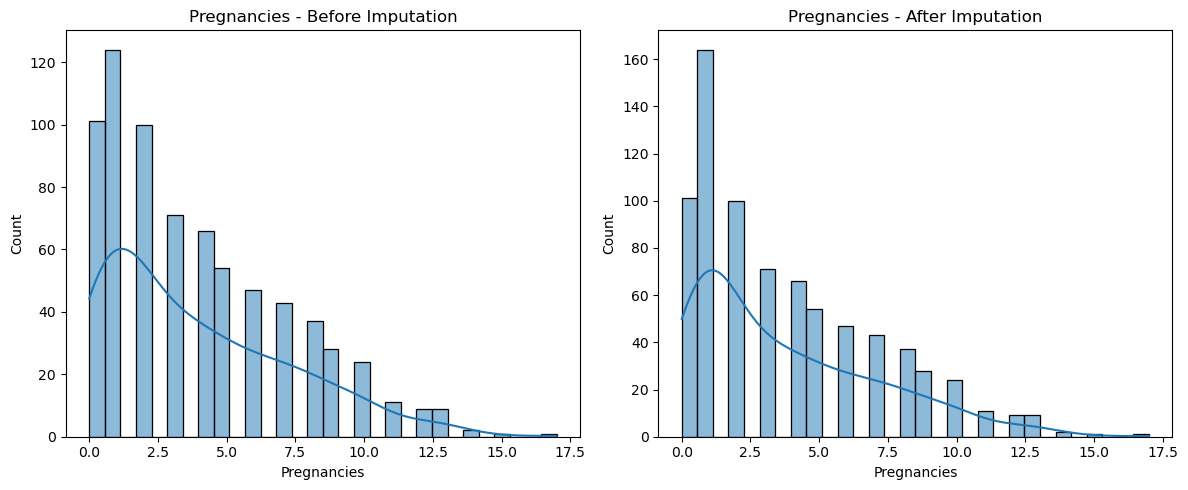

In [28]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df["Pregnancies"], kde=True, bins=30)
plt.title("Pregnancies - Before Imputation")

plt.subplot(1,2,2)
sns.histplot(df_imputed["Pregnancies"], kde=True, bins=30)
plt.title("Pregnancies - After Imputation")

plt.tight_layout()
plt.show()


### Observation:
- The distribution shows no significant shift after imputation, indicating stability in central tendency.
- Since the variable is discrete, mode imputation does not amplify outliers or distort the distribution.
- The chosen technique is appropriate for count-based data.
- Missing-value gaps are removed, resulting in a cleaner and continuous distribution.

### Glucose (Median Imputation)

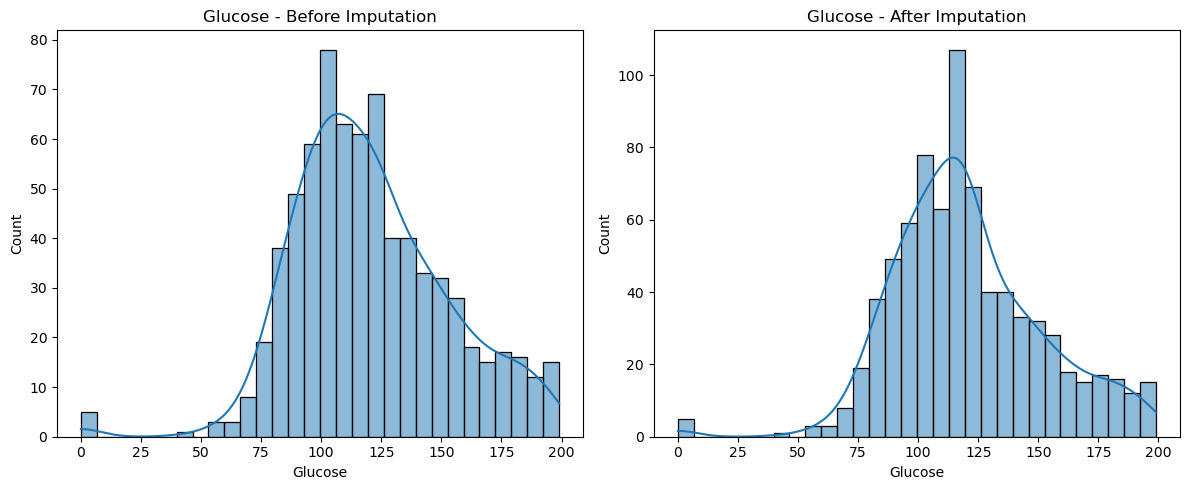

In [29]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df["Glucose"], kde=True, bins=30)
plt.title("Glucose - Before Imputation")

plt.subplot(1,2,2)
sns.histplot(df_imputed["Glucose"], kde=True, bins=30)
plt.title("Glucose - After Imputation")

plt.tight_layout()
plt.show()


### Observation:
- A minor distribution shift is observed, mainly in the central region.
- Median imputation reduces the impact of extreme glucose values, improving robustness.
- This technique is appropriate for slightly skewed biomedical measurements.
- Data quality improves with smoother density and fewer abrupt gaps.

#### BloodPressure (Median Imputation)

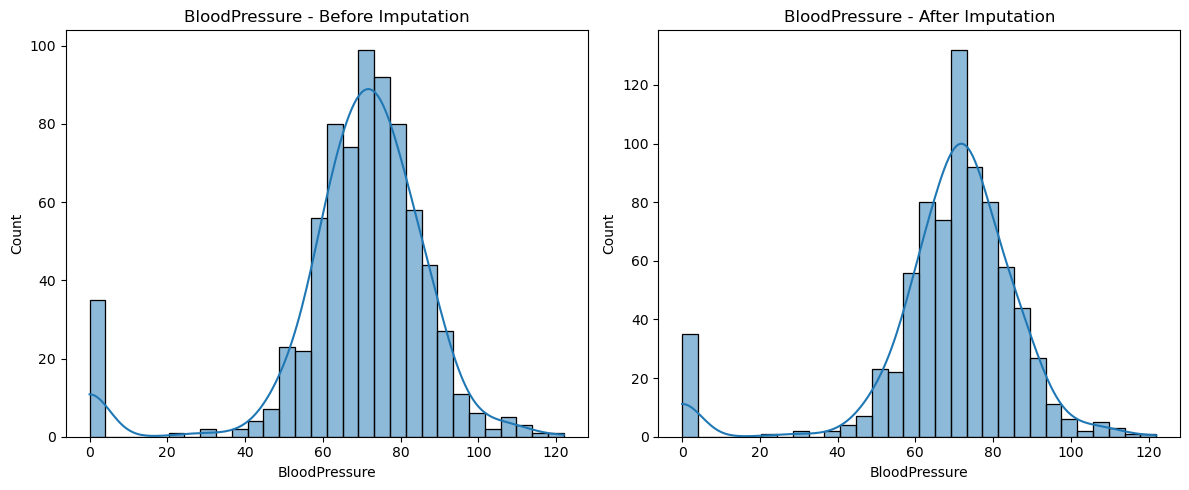

In [30]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df["BloodPressure"], kde=True, bins=30)
plt.title("BloodPressure - Before Imputation")

plt.subplot(1,2,2)
sns.histplot(df_imputed["BloodPressure"], kde=True, bins=30)
plt.title("BloodPressure - After Imputation")

plt.tight_layout()
plt.show()

### Observation:
- The overall distribution remains largely consistent, with slight central smoothing.
- Median imputation limits the influence of unusually high or low values.
- The method is well-suited for physiological data with mild skewness.
- The imputed data appears more stable and complete.

### SkinThickness (Median Imputation)

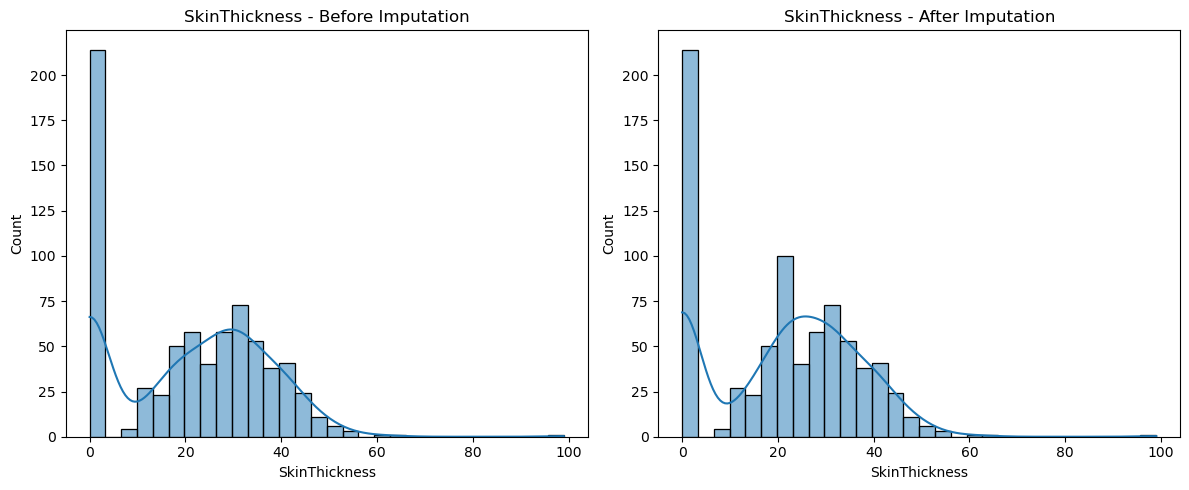

In [31]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df["SkinThickness"], kde=True, bins=30)
plt.title("SkinThickness - Before Imputation")

plt.subplot(1,2,2)
sns.histplot(df_imputed["SkinThickness"], kde=True, bins=30)
plt.title("SkinThickness - After Imputation")

plt.tight_layout()
plt.show()


### Observation:
- A noticeable improvement in distribution continuity is seen after imputation.
- Median reduces the effect of extreme or irregular values present in the data.
- This technique is appropriate due to skewed distribution.
- The dataset shows improved smoothness and reduced sparsity.

### Insulin (Median Imputation)

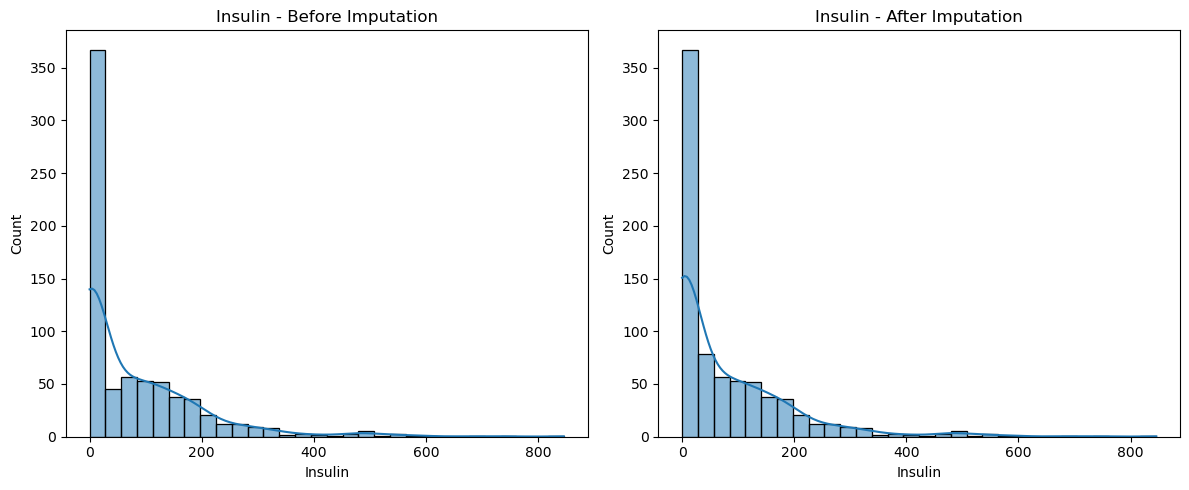

In [32]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df["Insulin"], kde=True, bins=30)
plt.title("Insulin - Before Imputation")

plt.subplot(1,2,2)
sns.histplot(df_imputed["Insulin"], kde=True, bins=30)
plt.title("Insulin - After Imputation")

plt.tight_layout()
plt.show()

#### Observation:
- The distribution becomes considerably more centered after imputation.
- Median effectively controls heavy right-skew and extreme outliers.
- This method is highly suitable for insulin data, which typically contains extreme values.
- Overall data quality significantly improves with better spread and density.

### BMI (Median Imputation)

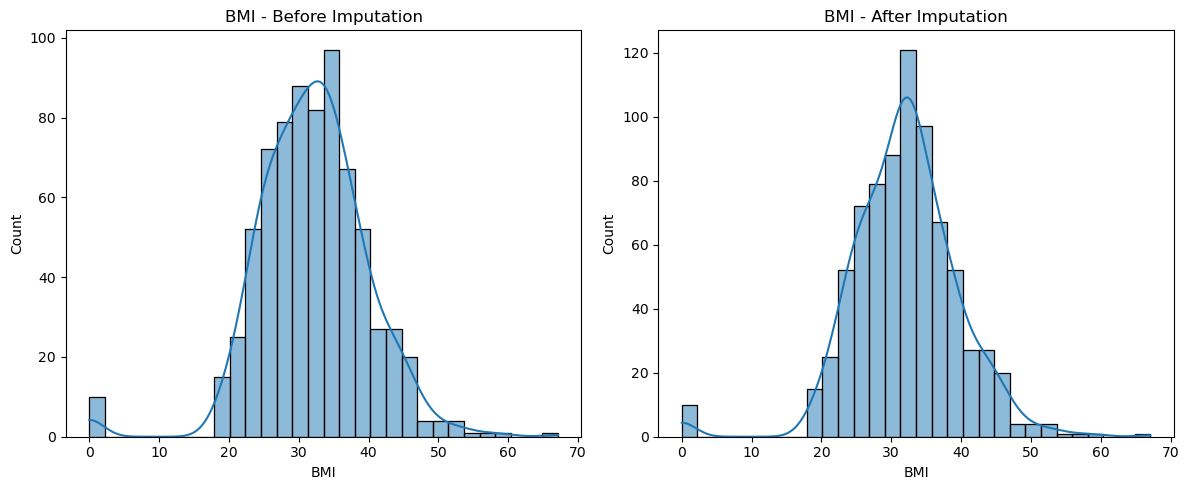

In [33]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df["BMI"], kde=True, bins=30)
plt.title("BMI - Before Imputation")

plt.subplot(1,2,2)
sns.histplot(df_imputed["BMI"], kde=True, bins=30)
plt.title("BMI - After Imputation")

plt.tight_layout()
plt.show()

### Observation:
- A slight central shift is visible, without altering the overall shape.
- Median imputation prevents distortion caused by obesity-related outliers.
- The technique is appropriate for BMI’s non-normal distribution.
- The resulting data is smoother and more consistent.

### DiabetesPedigreeFunction (Mean Imputation)

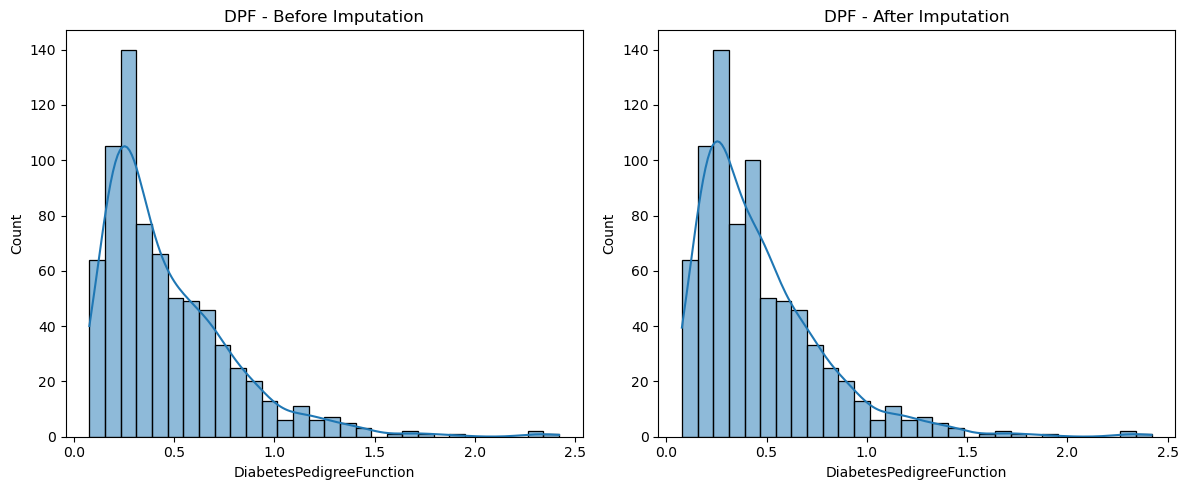

In [37]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df["DiabetesPedigreeFunction"], kde=True, bins=30)
plt.title("DPF - Before Imputation")

plt.subplot(1,2,2)
sns.histplot(df_imputed["DiabetesPedigreeFunction"], kde=True, bins=30)
plt.title("DPF - After Imputation")

plt.tight_layout()
plt.show()


### Observation:
- The distribution shows minimal shift, maintaining the original spread.
- Outliers are not excessively affected, as extreme values are limited.
- Mean imputation is appropriate due to relatively symmetric distribution.
- Data quality improves through uniformity and completeness.

### Age (Median Imputation)

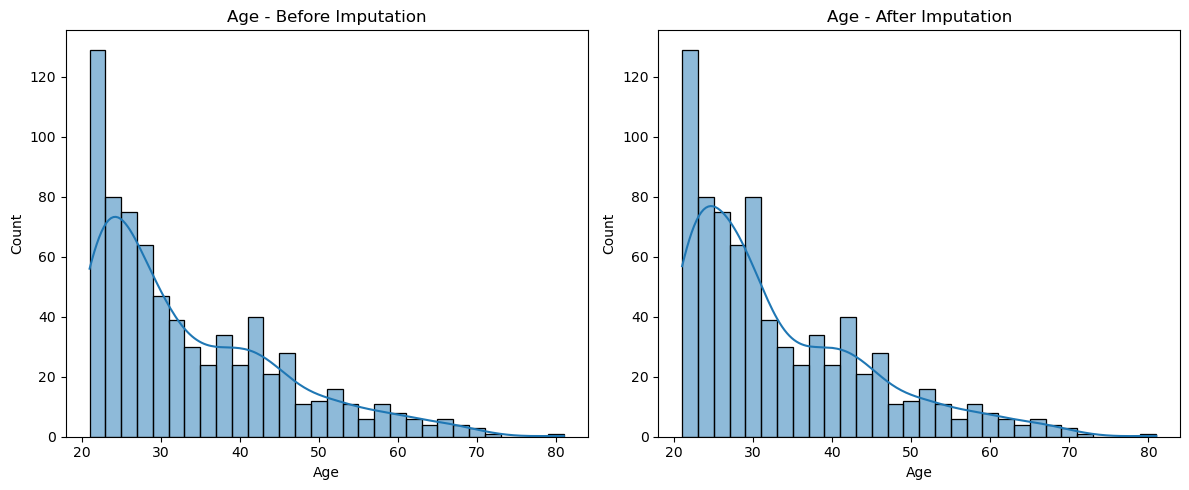

In [35]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df["Age"], kde=True, bins=30)
plt.title("Age - Before Imputation")

plt.subplot(1,2,2)
sns.histplot(df_imputed["Age"], kde=True, bins=30)
plt.title("Age - After Imputation")

plt.tight_layout()
plt.show()


### Observation:
- The age distribution remains stable with no major shifts.
- Median imputation avoids bias from extreme age values.
- This method is appropriate for skewed demographic data.
- Missing entries are resolved, leading to improved continuity.

### Outcome (Mode Imputation — Academic only)

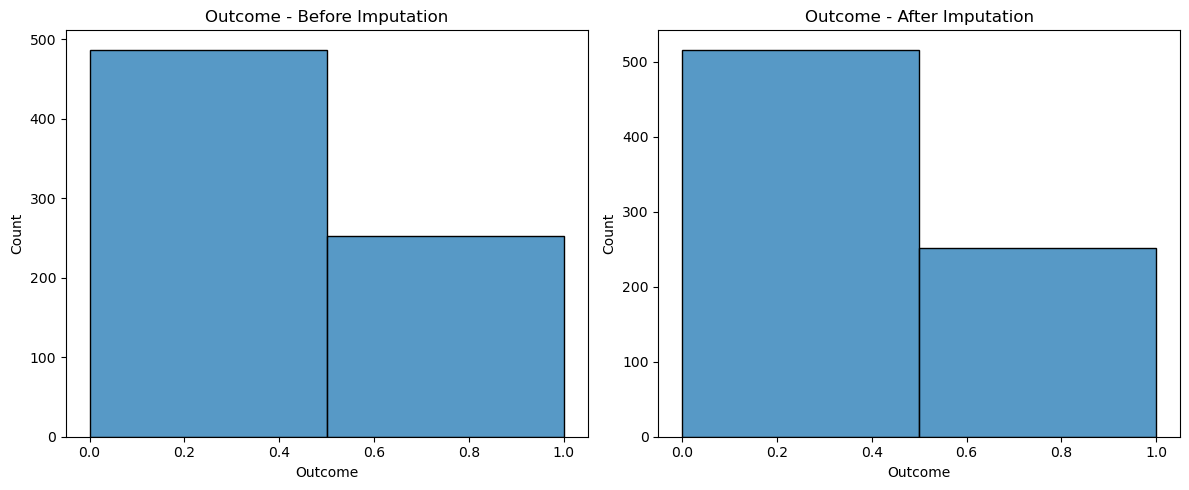

In [36]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df["Outcome"], bins=2)
plt.title("Outcome - Before Imputation")

plt.subplot(1,2,2)
sns.histplot(df_imputed["Outcome"], bins=2)
plt.title("Outcome - After Imputation")

plt.tight_layout()
plt.show()


### Note:
- The class distribution remains unchanged after imputation.
- Mode imputation does not introduce artificial class imbalance.
- This method is appropriate for categorical target data in academic analysis.
- Data completeness improves, though in real ML tasks dropping is preferred

# PART 4: Data Scaling

### Step 1: Select numerical feature columns

In [38]:
# Select numerical columns excluding the target
numerical_cols = df_imputed.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop("Outcome")


### Step 2: Create separate scaler objects

In [41]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

### Step 3: Apply StandardScaler

In [42]:
standard_scaled_data = standard_scaler.fit_transform(df_imputed[numerical_cols])

standard_scaled_df = pd.DataFrame(
    standard_scaled_data,
    columns=numerical_cols
)

### Step 4: Apply MinMaxScaler

In [43]:
minmax_scaled_data = minmax_scaler.fit_transform(df_imputed[numerical_cols])

minmax_scaled_df = pd.DataFrame(
    minmax_scaled_data,
    columns=numerical_cols
)

### Step 5: Apply RobustScaler

In [44]:
robust_scaled_data = robust_scaler.fit_transform(df_imputed[numerical_cols])

robust_scaled_df = pd.DataFrame(
    robust_scaled_data,
    columns=numerical_cols
)


### Step 6: Verify scaled data (optional)

In [45]:
print("Standard Scaled Data (sample):")
display(standard_scaled_df.head())

print("MinMax Scaled Data (sample):")
display(minmax_scaled_df.head())

print("Robust Scaled Data (sample):")
display(robust_scaled_df.head())


Standard Scaled Data (sample):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.667795,0.888622,0.153432,0.914633,-0.684349,0.204345,0.500598,1.467770
1,-0.823096,-1.143570,-0.159683,0.529208,-0.684349,-0.003553,-0.366062,-0.184703
2,1.264152,2.017617,-0.264055,-1.333683,-0.684349,-1.133999,0.641901,-0.097731
3,-0.823096,-1.014542,-0.159683,0.143782,0.139691,-0.510304,-0.943835,-1.054425
4,-1.121275,0.533795,-1.516513,0.914633,0.788404,1.438740,5.716256,-0.010758


MinMax Scaled Data (sample):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.476900,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


Robust Scaled Data (sample):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.810458,0.000,0.37500,-0.232,0.181818,0.661111,1.3125
1,-0.4,-0.836601,-0.375,0.18750,-0.232,0.000000,-0.105556,0.1250
2,1.0,1.725490,-0.500,-0.71875,-0.232,-0.988636,0.786111,0.1875
3,-0.4,-0.732026,-0.375,0.00000,0.520,-0.443182,-0.616667,-0.5000
4,-0.6,0.522876,-2.000,0.37500,1.112,1.261364,5.275000,0.2500


### PART 5: Visualizing Before & After Scaling

In [47]:
numerical_cols = standard_scaled_df.columns

## FEATURE-WISE SCALING COMPARISON

### Pregnancies

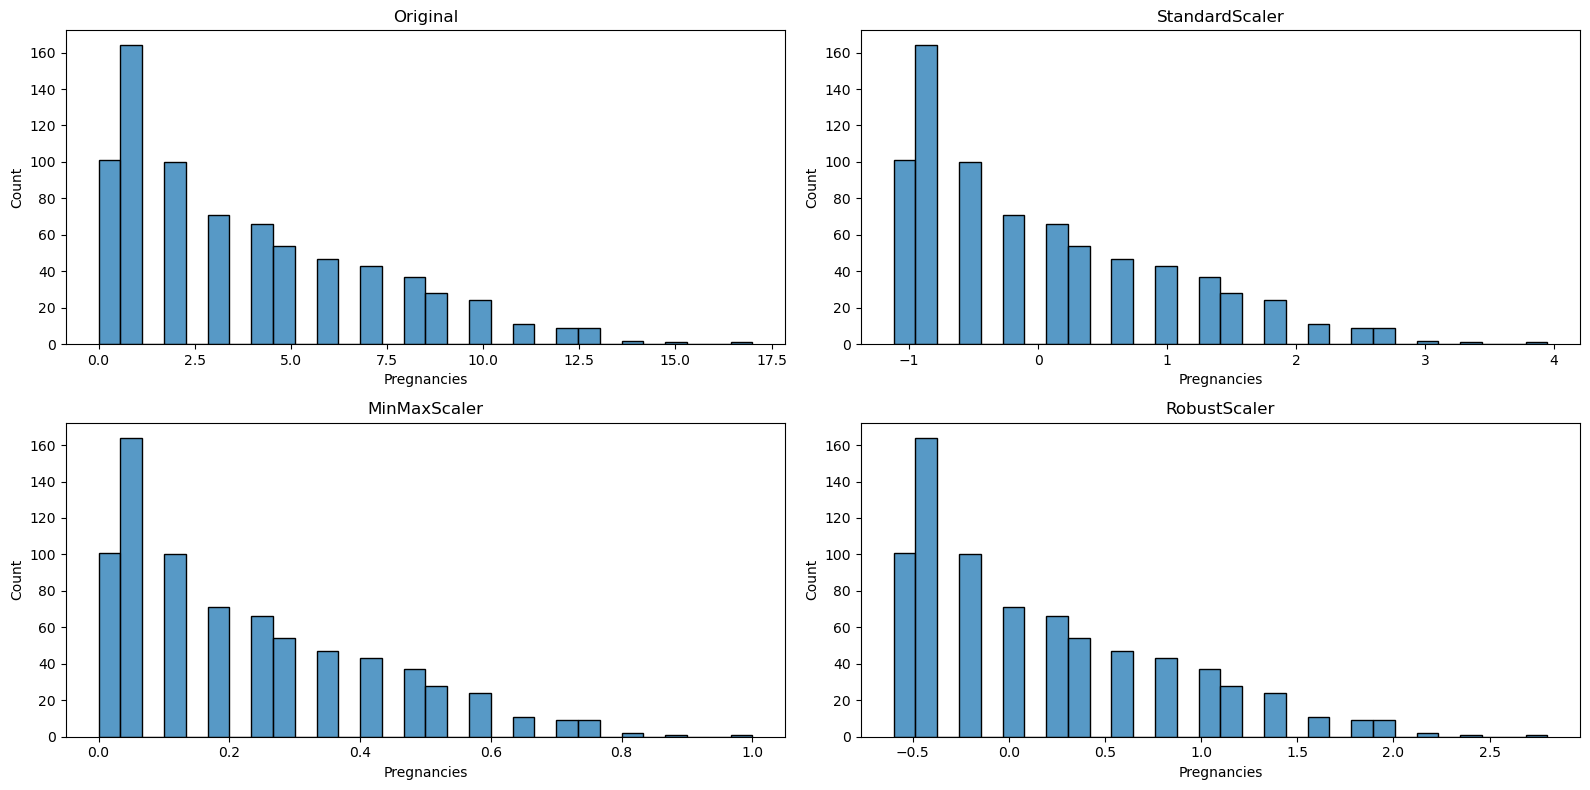

In [55]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.histplot(df_imputed["Pregnancies"], bins=30)
plt.title("Original")

plt.subplot(2,2,2)
sns.histplot(standard_scaled_df["Pregnancies"], bins=30)
plt.title("StandardScaler")

plt.subplot(2,2,3)
sns.histplot(minmax_scaled_df["Pregnancies"], bins=30)
plt.title("MinMaxScaler")

plt.subplot(2,2,4)
sns.histplot(robust_scaled_df["Pregnancies"], bins=30)
plt.title("RobustScaler")

plt.tight_layout()
plt.show()


### Observations
- StandardScaler centers the data but preserves the discrete distribution shape.
- MinMaxScaler compresses values into a fixed ranGE [0,1]
- RobustScaler produces a stable distribution resistant to extreme pregnancy counts.
- Overall smoothness improves while maintaining meaningful structure.

### Glucose

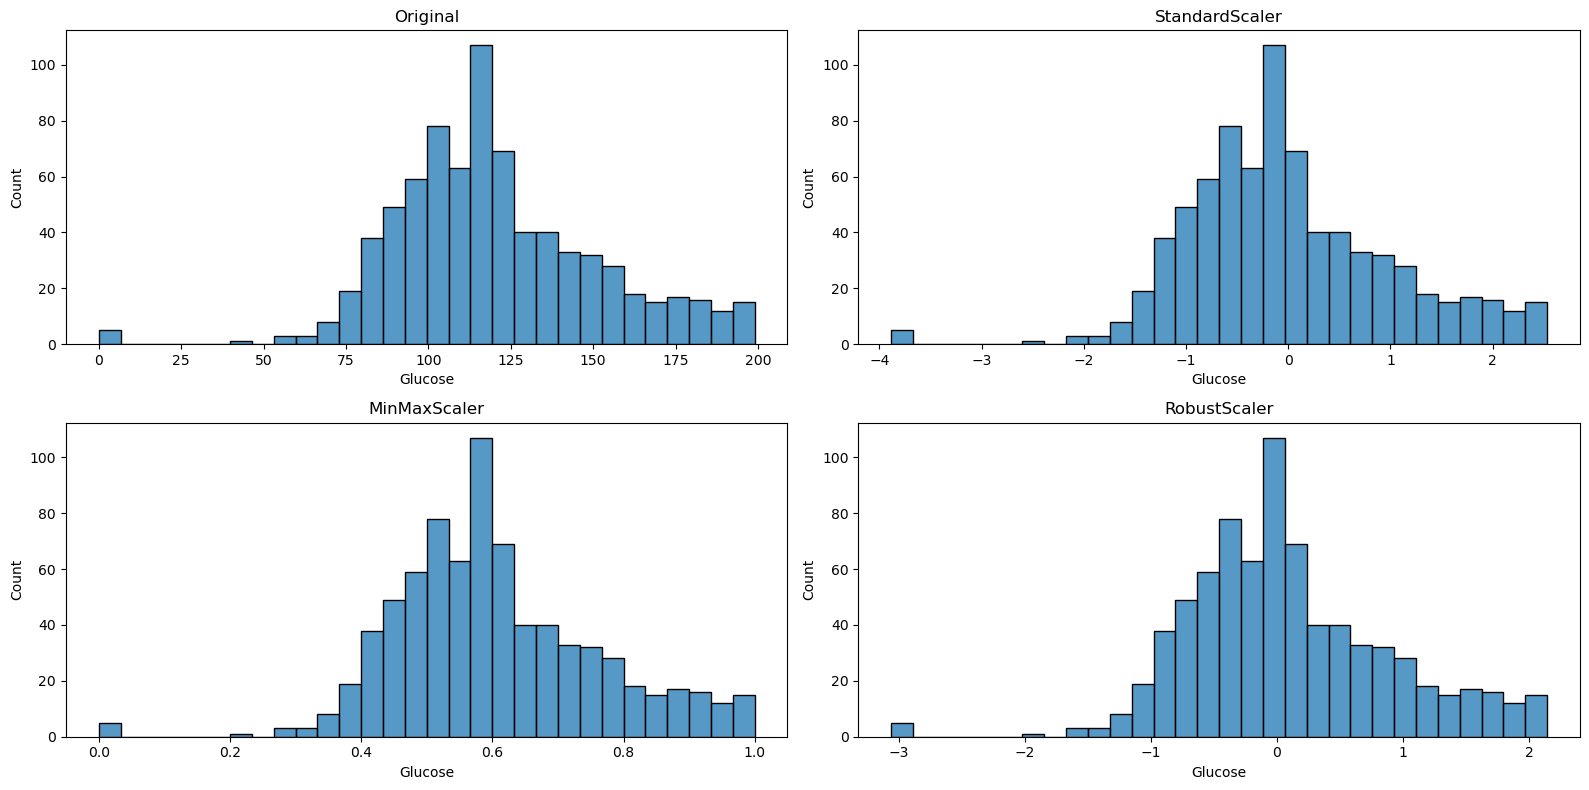

In [56]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.histplot(df_imputed["Glucose"], bins=30)
plt.title("Original")

plt.subplot(2,2,2)
sns.histplot(standard_scaled_df["Glucose"], bins=30)
plt.title("StandardScaler")

plt.subplot(2,2,3)
sns.histplot(minmax_scaled_df["Glucose"], bins=30)
plt.title("MinMaxScaler")

plt.subplot(2,2,4)
sns.histplot(robust_scaled_df["Glucose"], bins=30)
plt.title("RobustScaler")

plt.tight_layout()
plt.show()


#### Observations
- StandardScaler normalizes glucose values to zero mean and unit variance.
- MinMaxScaler forces glucose readings into [0,1], increasing outlier influence.
- RobustScaler minimizes the impact of abnormal glucose spikes.
- Robust scaling provides the most balanced and realistic transformation.

### BMI

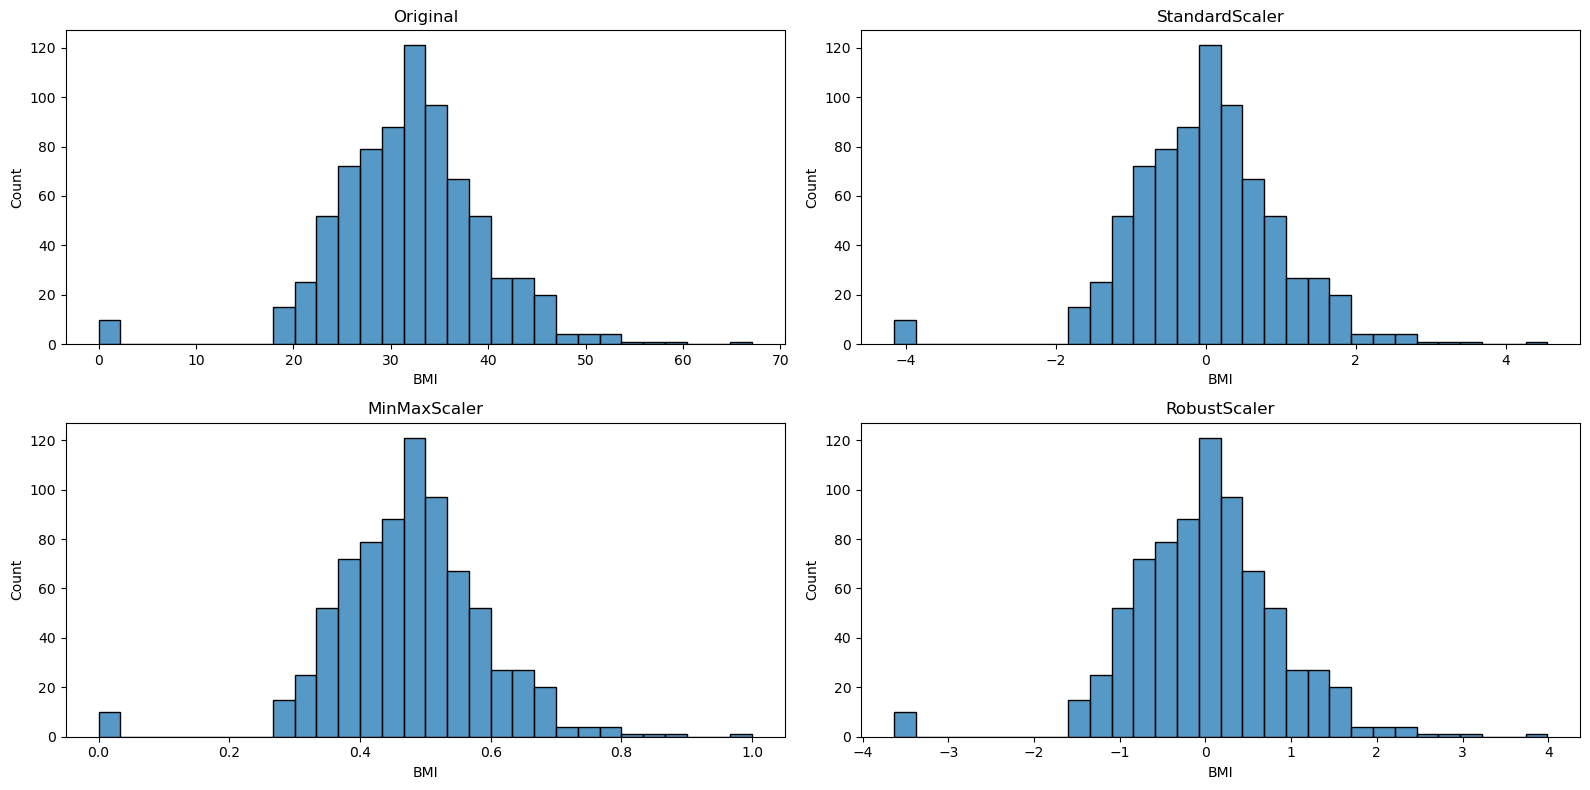

In [57]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.histplot(df_imputed["BMI"], bins=30)
plt.title("Original")

plt.subplot(2,2,2)
sns.histplot(standard_scaled_df["BMI"], bins=30)
plt.title("StandardScaler")

plt.subplot(2,2,3)
sns.histplot(minmax_scaled_df["BMI"], bins=30)
plt.title("MinMaxScaler")

plt.subplot(2,2,4)
sns.histplot(robust_scaled_df["BMI"], bins=30)
plt.title("RobustScaler")

plt.tight_layout()
plt.show()


### Observations
- StandardScaler rescales BMI but remains sensitive to obesity outliers.
- MinMaxScaler compresses BMI values, shrinking the central region.
- RobustScaler preserves the central BMI range while limiting extreme influence.
- Data quality improves with smoother and more interpretable scaling.

### Insulin

#### Visualization

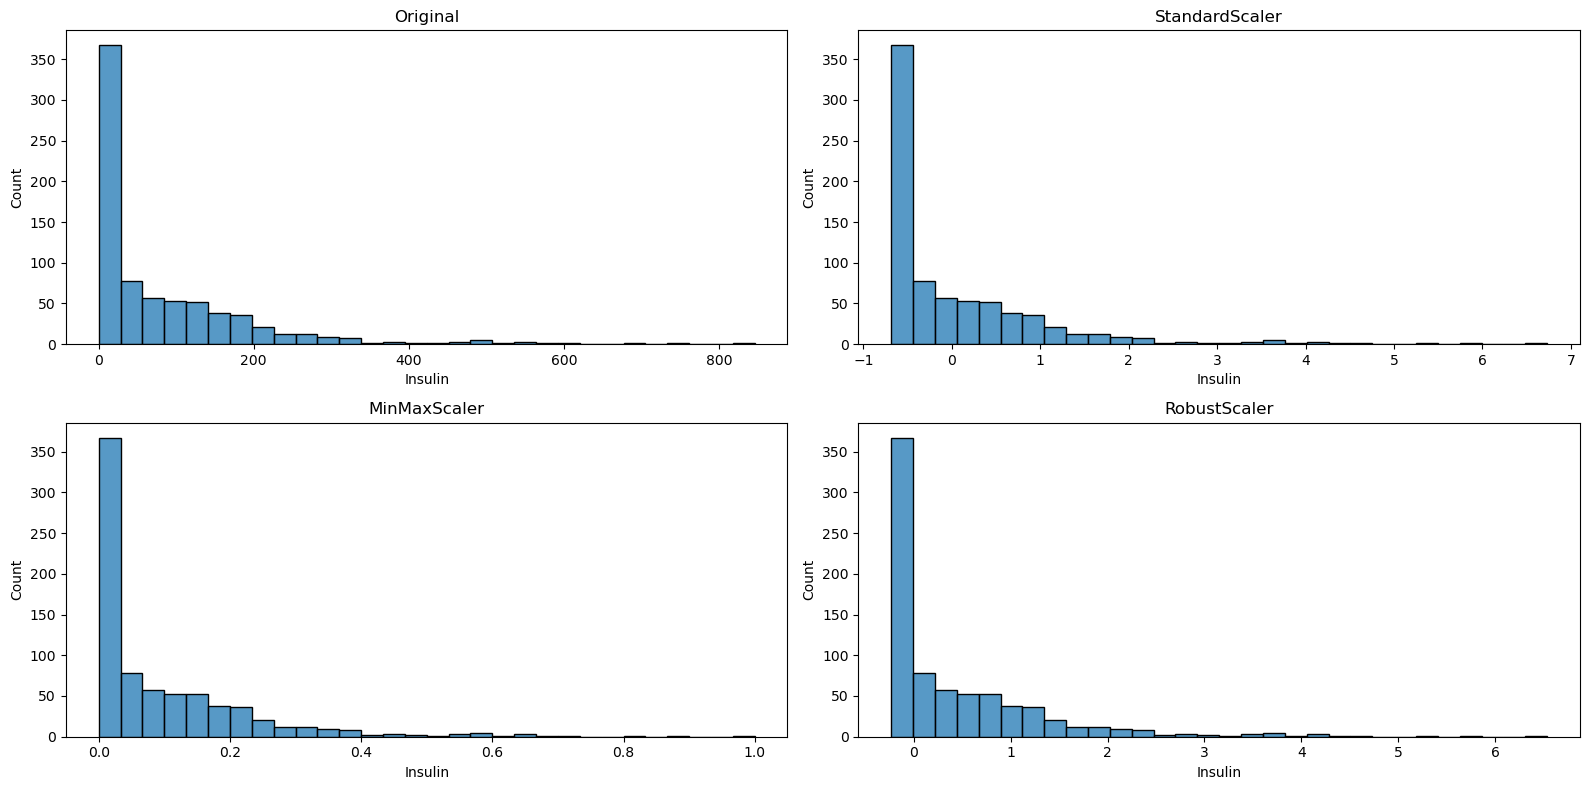

In [58]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.histplot(df_imputed["Insulin"], bins=30)
plt.title("Original")

plt.subplot(2,2,2)
sns.histplot(standard_scaled_df["Insulin"], bins=30)
plt.title("StandardScaler")

plt.subplot(2,2,3)
sns.histplot(minmax_scaled_df["Insulin"], bins=30)
plt.title("MinMaxScaler")

plt.subplot(2,2,4)
sns.histplot(robust_scaled_df["Insulin"], bins=30)
plt.title("RobustScaler")

plt.tight_layout()
plt.show()


### Observations
- StandardScaler exaggerates the influence of extreme insulin values.
- MinMaxScaler compresses most samples due to extreme highs.
- RobustScaler effectively neutralizes heavy skewness.
- RobustScaler shows the cleanest and most usable distribution.

### Age

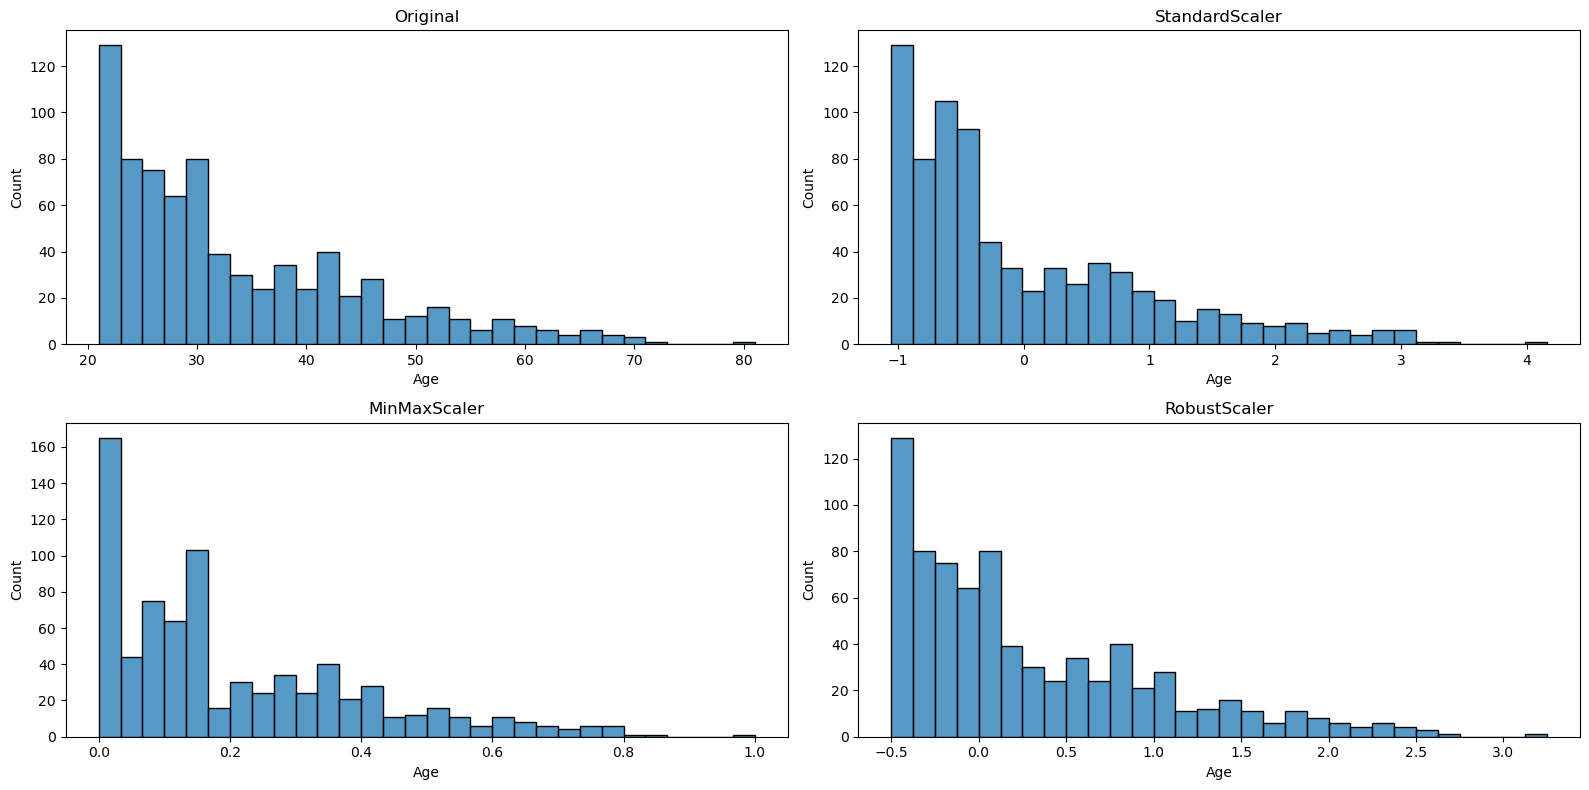

In [59]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.histplot(df_imputed["Age"], bins=30)
plt.title("Original")

plt.subplot(2,2,2)
sns.histplot(standard_scaled_df["Age"], bins=30)
plt.title("StandardScaler")

plt.subplot(2,2,3)
sns.histplot(minmax_scaled_df["Age"], bins=30)
plt.title("MinMaxScaler")

plt.subplot(2,2,4)
sns.histplot(robust_scaled_df["Age"], bins=30)
plt.title("RobustScaler")

plt.tight_layout()
plt.show()


### Observations
- StandardScaler maintains age variance while centering the distribution.
- MinMaxScaler squeezes age values into a narrow numeric range.
- RobustScaler avoids bias from extreme age values.
- Scaled distributions are smoother and model-friendly

- MinMaxScaler strictly bounds features but is highly outlier-sensitive.
- StandardScaler normalizes mean and variance without addressing extreme values.
- RobustScaler consistently handles outliers best across diabetes features.
- Feature-wise scaling improves comparability, stability, and learning efficiency.- 

### PART 6: Saving the Final Outputs

### Step 1:Add target column back
- Scaling is applied only to features, but the final dataset may include the target column for modeling.

In [60]:
standard_final_df = standard_scaled_df.copy()
minmax_final_df = minmax_scaled_df.copy()
robust_final_df = robust_scaled_df.copy()

# Add target column back
standard_final_df["Outcome"] = df_imputed["Outcome"].values
minmax_final_df["Outcome"] = df_imputed["Outcome"].values
robust_final_df["Outcome"] = df_imputed["Outcome"].values


### Step 2: Save scaled datasets as CSV files

In [61]:
standard_final_df.to_csv("diabetes_standard_scaled.csv", index=False)
minmax_final_df.to_csv("diabetes_minmax_scaled.csv", index=False)
robust_final_df.to_csv("diabetes_robust_scaled.csv", index=False)


### Step 3: Verify files

In [63]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'diabetes_minmax_scaled.csv', 'diabetes_robust_scaled.csv', 'diabetes_standard_scaled.csv', 'diabities ml.ipynb']


## Final Conclusion

##### The diabetes dataset was cleaned, imputed, and scaled using three different normalization techniques. Feature-wise visualization revealed that RobustScaler handled outliers most effectively, while StandardScaler normalized variance and MinMaxScaler constrained value ranges. The processed datasets are now consistent, interpretable, and suitable for downstream machine learning tasks.